In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
X=df.values

In [5]:
X

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


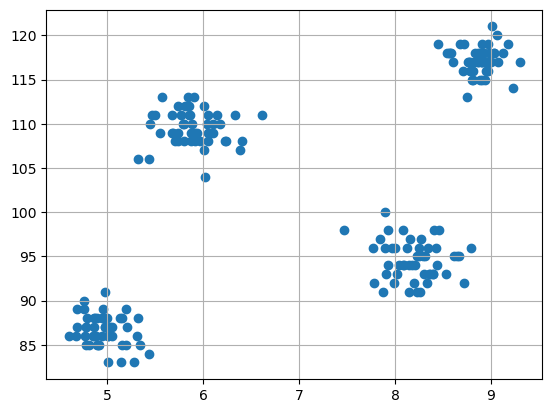

In [6]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [12]:
def initialize_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

In [16]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [17]:
def assign_clusters(X, centroids):
    distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
    clusters = np.argmin(distances, axis=0)
    return clusters

In [18]:
def update_centroids(X, clusters, k):
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return centroids


In [19]:
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.all(prev_centroids == centroids):
            break
    return clusters, centroids

In [20]:
wcss = []
for i in range(1, 11):
    clusters, centroids = kmeans(X, i)
    wcss.append(np.sum([euclidean_distance(X[j], centroids[int(clusters[j])]) ** 2 for j in range(len(X))]))

NameError: name 'euclidean_distance' is not defined

In [ ]:
clusters, centroids = kmeans(X, 4)

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i}', alpha=0.6, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('K-means Clustering')
plt.legend()
plt.show()


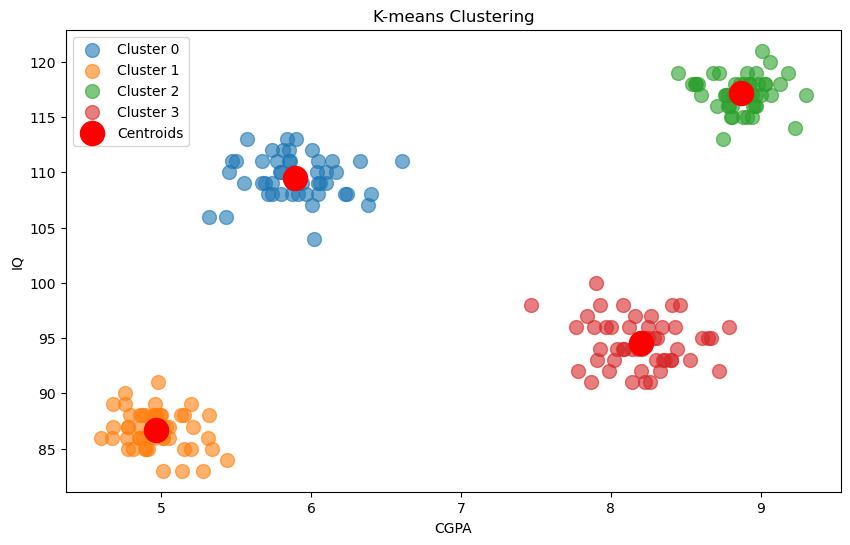

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

def assign_clusters(X, centroids):
    distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, k):
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.all(prev_centroids == centroids):
            break
    return clusters, centroids

# Load the dataset
df = pd.read_csv("student_clustering.csv")
X = df[['cgpa', 'iq']].values


# Choose the optimal number of clusters based on the elbow method
optimal_k = 4

# Run K-means with the optimal K
clusters, centroids = kmeans(X, optimal_k)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    plt.scatter(X[clusters == i][:, 0], X[clusters == i][:, 1], label=f'Cluster {i}', alpha=0.6, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('K-means Clustering')
plt.legend()
plt.show()
